<a href="https://colab.research.google.com/github/Hfelipini/claimed/blob/master/An%C3%A1lise_Sentimento_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests_oauthlib
!pip install twython
!pip install nltk
!pip install pyspark
#Tutorial: https://www.youtube.com/watch?v=ujId4ipkBio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Módulos Usados
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter API credentials
consumerKey = 'jZW6Dfje4Qf2qQcseMN8oWK6L'
consumerSecret = 'aQEHFWJhmx1wuTJFSHH7hXbsYf5FZ2ks2HgUOkefsL14DfRmqd'
accessToken = '849412140767342593-lqu60Ceu6VgSWSyUkolOHIf8fUVMVVs'
accessTokenSecret = 'aHpBV2133OHN2vLpp2RERBhZaCq6jaJa3iyZw0tVQ4mzh'

In [4]:
#Frequencia Update
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API Object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [14]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name ="BillGates", count= 5, lang = "en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i = i + 1 

Show the 5 recent tweets: 

1).@amortowles is one of my favorite storytellers. I was wowed by his writing in The Lincoln Highway. https://t.co/EyQSRJDMVj

2)“It’s also a reminder that it’s not just about having enough vaccines or therapeutics. It’s about figuring out how to help countries deploy them.” @ashishkjha https://t.co/7HnwAX7GY6

3)I got to join the @Breakthrough team to talk about the incredible work they’re doing to accelerate climate innovation. I’m lucky to work with such smart and dedicated individuals. https://t.co/cNe6QwfmOb

4)Today’s ruling makes it more challenging for the US to hit its climate goals. It’s now more important than ever for Congress to level the playing field for clean technologies.

5)Being in New York is always fun – you never know who you’ll run into. It was great meeting you and Namrata! https://t.co/qBykgcXDS6



In [16]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,.@amortowles is one of my favorite storyteller...
1,“It’s also a reminder that it’s not just about...
2,I got to join the @Breakthrough team to talk a...
3,Today’s ruling makes it more challenging for t...
4,Being in New York is always fun – you never kn...


In [18]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
    text = re.sub(r'#', '', text) #Removed the Hashtag
    # Ideia de utilizar o re.sub e filtrar por todos os tweets que estejam falando de alguma ação em especifico no momento
    text = re.sub(r'RT[\s]+', '', text) #Removed RT
    text = re.sub(r'https?:\/\/S+', '', text) #Removed the hyper link
    return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df.head()

,Tweets
0,. is one of my favorite storytellers. I was wo...
1,“It’s also a reminder that it’s not just about...
2,I got to join the team to talk about the incr...
3,Today’s ruling makes it more challenging for t...
4,Being in New York is always fun – you never kn...


In [19]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df.head()

,Tweets,Subjectivity,Polarity
0,. is one of my favorite storytellers. I was wo...,1.000000,0.500000
1,“It’s also a reminder that it’s not just about...,0.500000,0.000000
2,I got to join the team to talk about the incr...,0.719048,0.361905
3,Today’s ruling makes it more challenging for t...,0.740000,0.453333
4,Being in New York is always fun – you never kn...,0.468182,0.478788


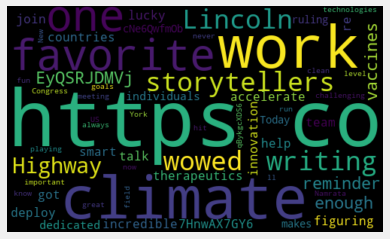

In [22]:
#Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [25]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,. is one of my favorite storytellers. I was wo...,1.000000,0.500000,Positive
1,“It’s also a reminder that it’s not just about...,0.500000,0.000000,Neutral
2,I got to join the team to talk about the incr...,0.719048,0.361905,Positive
3,Today’s ruling makes it more challenging for t...,0.740000,0.453333,Positive
4,Being in New York is always fun – you never kn...,0.468182,0.478788,Positive
